# 2023-02-17

In [1]:
!pip install finance-datareader


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


 - 상단 볼린저 밴드 = 중간볼린저 밴드 + 2*표준편차
 - 중간 볼린저 밴드 = 종가의 20일 이동평균
 - 하단 볼린저 밴드 = 중간볼린저 밴드 - 2*표준편차

In [2]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

In [4]:
bitcoin = fdr.DataReader('BTC/KRW', '2020')
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,8308229.5,8376938.5,8287634.5,8315985.5,8315985.5,2.144279e+13
2020-01-02,8318730.5,8335989.5,8026049.5,8084144.5,8084144.5,2.407384e+13
2020-01-03,8082939.5,8638980.0,8022294.0,8563107.0,8563107.0,3.277405e+13
2020-01-04,8563679.0,8659292.0,8521870.0,8639788.0,8639788.0,2.150344e+13
2020-01-05,8639549.0,8795827.0,8628617.0,8641188.0,8641188.0,2.299835e+13


In [6]:
# 종가의 20일 이동평균

bitcoin['MA20'] = bitcoin['Close'].rolling(20, min_periods=1).mean()
bitcoin

,Open,High,Low,Close,Adj Close,Volume,MA20
Date,,,,,,,
2020-01-01,8308229.5,8376938.5,8287634.5,8315985.5,8315985.5,2.144279e+13,8.315986e+06
2020-01-02,8318730.5,8335989.5,8026049.5,8084144.5,8084144.5,2.407384e+13,8.200065e+06
2020-01-03,8082939.5,8638980.0,8022294.0,8563107.0,8563107.0,3.277405e+13,8.321079e+06
2020-01-04,8563679.0,8659292.0,8521870.0,8639788.0,8639788.0,2.150344e+13,8.400756e+06
2020-01-05,8639549.0,8795827.0,8628617.0,8641188.0,8641188.0,2.299835e+13,8.448843e+06
...,...,...,...,...,...,...,...
2023-02-15,28277916.0,31213578.0,28250184.0,31213578.0,31213578.0,4.171166e+13,2.859567e+07
2023-02-16,NaN,NaN,NaN,NaN,NaN,NaN,2.860660e+07
2023-02-17,NaN,NaN,NaN,NaN,NaN,NaN,2.862200e+07


In [ ]:
# 상단 볼린저 밴드 = 중간볼린저 밴드 + 2 * 표준편차 -> upper
# 하단 볼린저 밴드 = 중간볼린저 밴드 - 2 * 표준편차 -> lower

# .std()
# bitcoin['MA20'] + bitcoin['Close'].std() * 2

In [10]:
bitcoin['std'] = bitcoin['Close'].rolling(20, min_periods=1).std()    # 중간 볼린저 밴드
bitcoin['upper'] = bitcoin['MA20'] + bitcoin['std'] * 2               # 상단
bitcoin['lower'] = bitcoin['MA20'] - bitcoin['std'] * 2                # 하단
bitcoin

,Open,High,Low,Close,Adj Close,Volume,MA20,std,upper,lower
Date,,,,,,,,,,
2020-01-01,8308229.5,8376938.5,8287634.5,8315985.5,8315985.5,2.144279e+13,8.315986e+06,NaN,NaN,NaN
2020-01-02,8318730.5,8335989.5,8026049.5,8084144.5,8084144.5,2.407384e+13,8.200065e+06,1.639363e+05,8.527938e+06,7.872192e+06
2020-01-03,8082939.5,8638980.0,8022294.0,8563107.0,8563107.0,3.277405e+13,8.321079e+06,2.395219e+05,8.800123e+06,7.842035e+06
2020-01-04,8563679.0,8659292.0,8521870.0,8639788.0,8639788.0,2.150344e+13,8.400756e+06,2.522717e+05,8.905300e+06,7.896213e+06
2020-01-05,8639549.0,8795827.0,8628617.0,8641188.0,8641188.0,2.299835e+13,8.448843e+06,2.435000e+05,8.935843e+06,7.961843e+06
...,...,...,...,...,...,...,...,...,...,...
2023-02-15,28277916.0,31213578.0,28250184.0,31213578.0,31213578.0,4.171166e+13,2.859567e+07,8.516136e+05,3.029890e+07,2.689244e+07
2023-02-16,NaN,NaN,NaN,NaN,NaN,NaN,2.860660e+07,8.735073e+05,3.035361e+07,2.685958e+07
2023-02-17,NaN,NaN,NaN,NaN,NaN,NaN,2.862200e+07,8.961735e+05,3.041435e+07,2.682965e+07


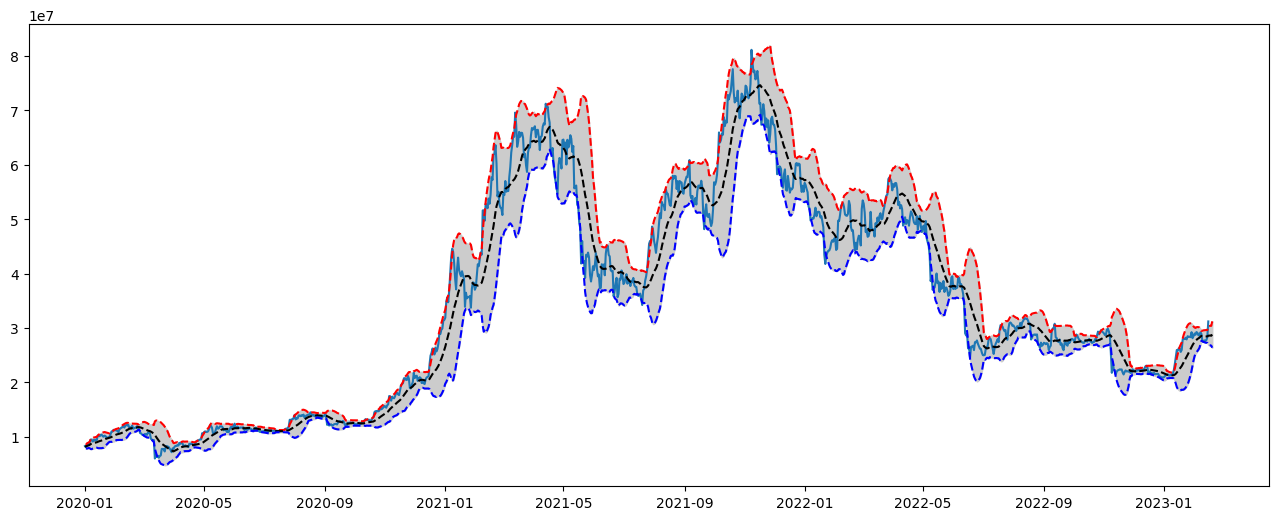

In [11]:
plt.figure(figsize= (16, 6))
plt.plot(bitcoin.index, bitcoin['Close'])
plt.plot(bitcoin.index, bitcoin['upper'], 'r--')
plt.plot(bitcoin.index, bitcoin['MA20'], 'k--')
plt.plot(bitcoin.index, bitcoin['lower'], 'b--')
plt.fill_between(bitcoin.index, bitcoin['upper'], bitcoin['lower'], color='0.8')
plt.show()

In [12]:
# 20일 이동평균의 표준편차

bitcoin['MA20'].std()

19179793.746272564

In [13]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume,MA20,std,upper,lower
Date,,,,,,,,,,
2020-01-01,8308229.5,8376938.5,8287634.5,8315985.5,8315985.5,2.144279e+13,8315985.50,NaN,NaN,NaN
2020-01-02,8318730.5,8335989.5,8026049.5,8084144.5,8084144.5,2.407384e+13,8200065.00,163936.343257,8.527938e+06,7.872192e+06
2020-01-03,8082939.5,8638980.0,8022294.0,8563107.0,8563107.0,3.277405e+13,8321079.00,239521.871461,8.800123e+06,7.842035e+06
2020-01-04,8563679.0,8659292.0,8521870.0,8639788.0,8639788.0,2.150344e+13,8400756.25,252271.694691,8.905300e+06,7.896213e+06
2020-01-05,8639549.0,8795827.0,8628617.0,8641188.0,8641188.0,2.299835e+13,8448842.60,243499.982009,8.935843e+06,7.961843e+06


<AxesSubplot: xlabel='Date'>

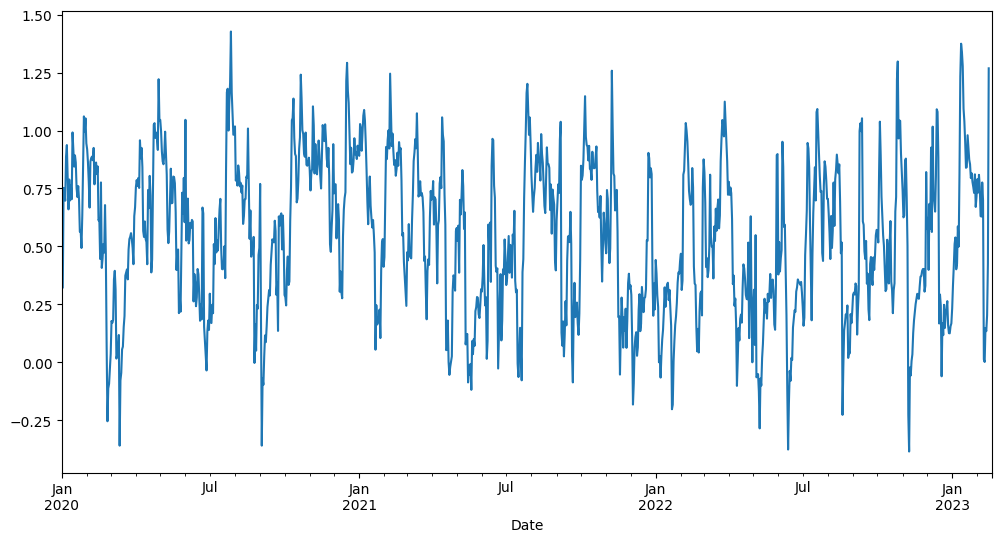

In [14]:
bitcoin['%b'] = (bitcoin['Close'] - bitcoin['lower']) / (bitcoin['upper'] - bitcoin['lower'])
bitcoin['%b'].plot(figsize = (12, 6))

<AxesSubplot: xlabel='Date'>

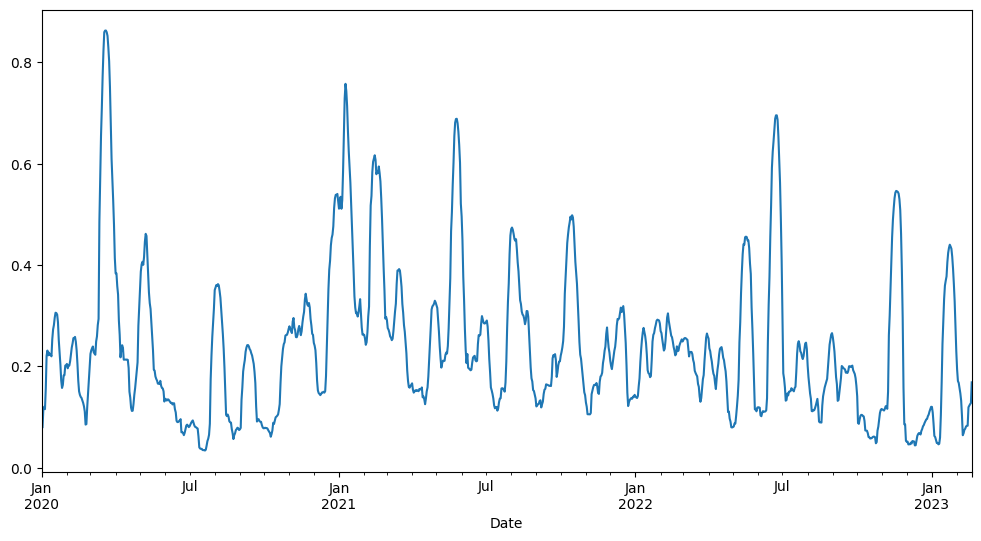

In [18]:
bitcoin['bandwidth'] = (bitcoin['upper'] - bitcoin['lower']) / bitcoin['MA20']
bitcoin['bandwidth'].plot(figsize=(12, 6))

In [ ]:
# bandwidth가 크다 -> 변동성이 크다.
# bandwidth가 작다 -> 변동성이 작다.
# (변동성이 커졌다 -> 작아졌다.) -> 추세가 바뀌었다.

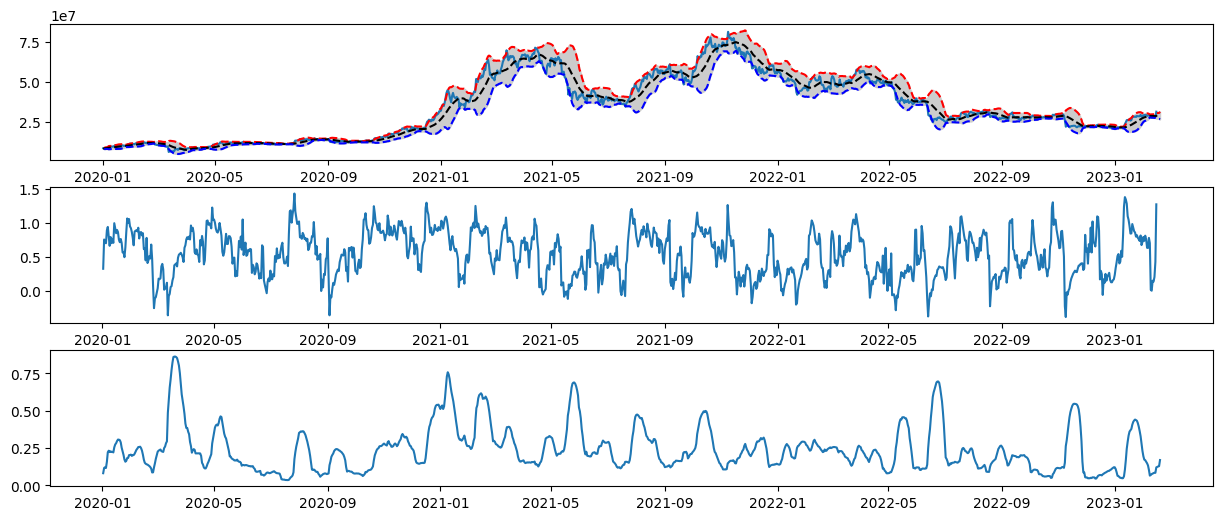

In [20]:
plt.figure(figsize = (15, 6))
plt.subplot(3, 1, 1)
plt.plot(bitcoin.index, bitcoin['Close'])
plt.plot(bitcoin.index, bitcoin['upper'], 'r--')
plt.plot(bitcoin.index, bitcoin['MA20'], 'k--')
plt.plot(bitcoin.index, bitcoin['lower'], 'b--')
plt.fill_between(bitcoin.index, bitcoin['upper'], bitcoin['lower'], color='0.8')

plt.subplot(3, 1, 2)
plt.plot(bitcoin.index, bitcoin['%b'])

plt.subplot(3, 1, 3)
plt.plot(bitcoin.index, bitcoin['bandwidth'])